# HR Employee Attrition

## 1- Import libraries

In [1]:
import matplotlib.pyplot as plt
# data exploration
import pandas as pd
# data visualization
import seaborn as sns
import numpy as np
# data preprocessing


# 2- Data Load

In [2]:
df = pd.read_csv("EA.csv")

# Example: columns and how many values you want to null
null_counts = {
    'Age': 4000,
    'Years at Company': 8000,
    'Job Role': 2500,
    'Monthly Income': 5080,
    'Work-Life Balance': 6000,
    'Job Satisfaction': 4500,
    'Performance Rating': 3340,
    'Number of Dependents': 3500,
    'Job Level': 2607,
    'Company Size': 5500,
    'Company Tenure': 7000,
    'Remote Work': 2800,
    'Leadership Opportunities': 7200,
    'Innovation Opportunities': 3700,
    'Company Reputation': 4100,
    'Employee Recognition': 3900
}

# Loop through and randomly set NaN
for col, n_nulls in null_counts.items():
    # Randomly choose n_nulls unique indices
    indices = np.random.choice(df.index, size=n_nulls, replace=False)
    # Set those rows to NaN in this column
    df.loc[indices, col] = np.nan

# Check how many nulls now
print(df.isnull().sum())


Employee ID                  4222
Age                          7929
Gender                       4222
Years at Company            11669
Job Role                     6561
Monthly Income               8919
Work-Life Balance            9791
Job Satisfaction             8387
Performance Rating           7338
Number of Promotions         4221
Overtime                     4221
Distance from Home           4222
Education Level              4219
Marital Status               4220
Number of Dependents         7484
Job Level                    6637
Company Size                 9333
Company Tenure              10688
Remote Work                  6820
Leadership Opportunities    24371
Innovation Opportunities     7662
Company Reputation           8030
Employee Recognition         7834
Attrition                    4220
dtype: int64


In [3]:
df.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410.0,31.0,Male,19.0,Education,5390.0,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756.0,59.0,Female,4.0,Media,5534.0,NaN,High,Low,3.0,...,3.0,Mid,Medium,NaN,No,NaN,NaN,Fair,Low,Stayed
2,30257.0,24.0,Female,10.0,Healthcare,8159.0,Good,High,Low,0.0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791.0,36.0,Female,7.0,Education,3989.0,Good,High,High,1.0,...,2.0,Mid,Small,50.0,Yes,NaN,No,Good,Medium,Stayed
4,65026.0,56.0,Male,41.0,Education,4821.0,NaN,Very High,NaN,0.0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
5,24368.0,NaN,Female,3.0,Technology,NaN,Fair,High,Below Average,3.0,...,0.0,Mid,Medium,47.0,No,No,Yes,Fair,High,Left
6,64970.0,47.0,Male,23.0,Education,3681.0,Fair,High,High,1.0,...,3.0,Entry,Small,93.0,NaN,No,No,Good,Medium,Left
7,36999.0,48.0,Male,16.0,Finance,NaN,NaN,Very High,High,2.0,...,4.0,Entry,Medium,88.0,No,NaN,No,Excellent,NaN,Stayed
8,32714.0,57.0,Male,44.0,Education,3773.0,Good,Medium,High,1.0,...,4.0,Entry,Medium,75.0,No,No,No,Fair,Medium,Stayed
9,15944.0,24.0,Female,1.0,Healthcare,7319.0,Poor,High,Average,1.0,...,4.0,Entry,Large,NaN,No,No,Yes,Good,Low,Left


# 3- Data Exploration

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               55376 non-null  float64
 1   Age                       51661 non-null  float64
 2   Gender                    55376 non-null  object 
 3   Years at Company          47912 non-null  float64
 4   Job Role                  53066 non-null  object 
 5   Monthly Income            50677 non-null  float64
 6   Work-Life Balance         49795 non-null  object 
 7   Job Satisfaction          51187 non-null  object 
 8   Performance Rating        52256 non-null  object 
 9   Number of Promotions      55377 non-null  float64
 10  Overtime                  55377 non-null  object 
 11  Distance from Home        55376 non-null  float64
 12  Education Level           55379 non-null  object 
 13  Marital Status            55378 non-null  object 
 14  Number

In [433]:
df.describe()  # statics from data

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,55376.000000,51661.000000,47912.000000,50677.000000,55377.000000,55376.000000,52140.000000,48882.000000
mean,37177.339822,38.592129,15.753047,7300.702192,0.831573,49.984398,1.650595,55.791191
std,21519.509080,12.070857,11.244680,2155.591722,0.995004,28.491606,1.556301,25.422366
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18518.750000,28.000000,7.000000,5649.000000,0.000000,25.000000,0.000000,36.000000
50%,37121.500000,39.000000,13.000000,7350.000000,1.000000,50.000000,1.000000,56.000000
75%,55851.500000,49.000000,23.000000,8886.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,127.000000


In [434]:
df.describe(include="object")

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,55376,53066,49795,51187,52256,55377,55379,55378,52961,50263,52772,35170,51945,51597,51739,55378
unique,2,5,5,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,30401,13815,18793,25612,31451,37249,16549,27778,21207,25137,42734,33491,43486,25834,20688,29034


In [435]:
df.shape

(59598, 24)

In [436]:
df["Attrition"].value_counts()

Attrition
Stayed    29034
Left      26344
Name: count, dtype: int64

In [437]:
df.dtypes

Employee ID                 float64
Age                         float64
Gender                       object
Years at Company            float64
Job Role                     object
Monthly Income              float64
Work-Life Balance            object
Job Satisfaction             object
Performance Rating           object
Number of Promotions        float64
Overtime                     object
Distance from Home          float64
Education Level              object
Marital Status               object
Number of Dependents        float64
Job Level                    object
Company Size                 object
Company Tenure              float64
Remote Work                  object
Leadership Opportunities     object
Innovation Opportunities     object
Company Reputation           object
Employee Recognition         object
Attrition                    object
dtype: object

In [438]:
cat_col = [col for col in df.columns if df[col].dtype == "object"]
num_col = [col for col in df.columns if df[col].dtype == "float"]

- > get categorical and numerical columns

In [439]:
# show unique values objects
for col in df.columns:
    print(df[col].value_counts())
    print("-" * 30)

Employee ID
8410.0     1
11660.0    1
10692.0    1
21180.0    1
46544.0    1
          ..
9642.0     1
32242.0    1
4076.0     1
60313.0    1
15796.0    1
Name: count, Length: 55376, dtype: int64
------------------------------
Age
34.0    1305
47.0    1304
45.0    1280
53.0    1279
40.0    1278
39.0    1276
59.0    1275
38.0    1275
49.0    1271
30.0    1267
43.0    1263
41.0    1263
20.0    1258
35.0    1254
46.0    1250
36.0    1245
55.0    1244
42.0    1243
27.0    1232
22.0    1232
58.0    1232
21.0    1225
25.0    1222
26.0    1215
28.0    1214
57.0    1212
32.0    1211
54.0    1211
48.0    1210
19.0    1206
44.0    1205
51.0    1200
56.0    1199
37.0    1198
24.0    1192
33.0    1190
23.0    1181
50.0    1181
52.0    1178
31.0    1174
29.0    1163
18.0    1148
Name: count, dtype: int64
------------------------------
Gender
Male      30401
Female    24975
Name: count, dtype: int64
------------------------------
Years at Company
5.0     1968
8.0     1958
2.0     1957
1.0     1934
9

# 4- Data Cleaning

## Handle missing values

#### Drop nulls

In [440]:
# check nulls in rows
(df.isnull().sum(axis=1) > 7).sum()

4220

In [441]:
df = df[df.isnull().sum(axis=1) <= 7]

- > drop rows that have more than 7 null values

In [442]:
# check nulls in each column
df.isnull().sum()

Employee ID                     3
Age                          3718
Gender                          3
Years at Company             7466
Job Role                     2313
Monthly Income               4702
Work-Life Balance            5584
Job Satisfaction             4191
Performance Rating           3122
Number of Promotions            2
Overtime                        2
Distance from Home              3
Education Level                 0
Marital Status                  1
Number of Dependents         3239
Job Level                    2418
Company Size                 5116
Company Tenure               6496
Remote Work                  2607
Leadership Opportunities    20208
Innovation Opportunities     3433
Company Reputation           3781
Employee Recognition         3639
Attrition                       1
dtype: int64

In [443]:
df.drop(columns="Leadership Opportunities", inplace=True)

- > there is too many null values in this column

In [444]:
cat_col.remove("Leadership Opportunities")

#### Fill missing values

In [445]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_11760\1300900111.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


- > fill gender with mode

In [446]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_11760\149581262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


- > fill age with mean

In [447]:
for col in cat_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_11760\2950105507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


- > Fill categorical type with mode

In [448]:
for col in num_col:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_11760\1718542663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


- > Fill numerical type with median

In [449]:
df.isna().sum().sum()

0

- > check nulls

### handle outliers

In [450]:
for col in num_col:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    # df = np.where( df[col] > upper_bound, upper_bound, np.where( df[col] < lower_bound, lower_bound, df[col] ))

- > remove outlier

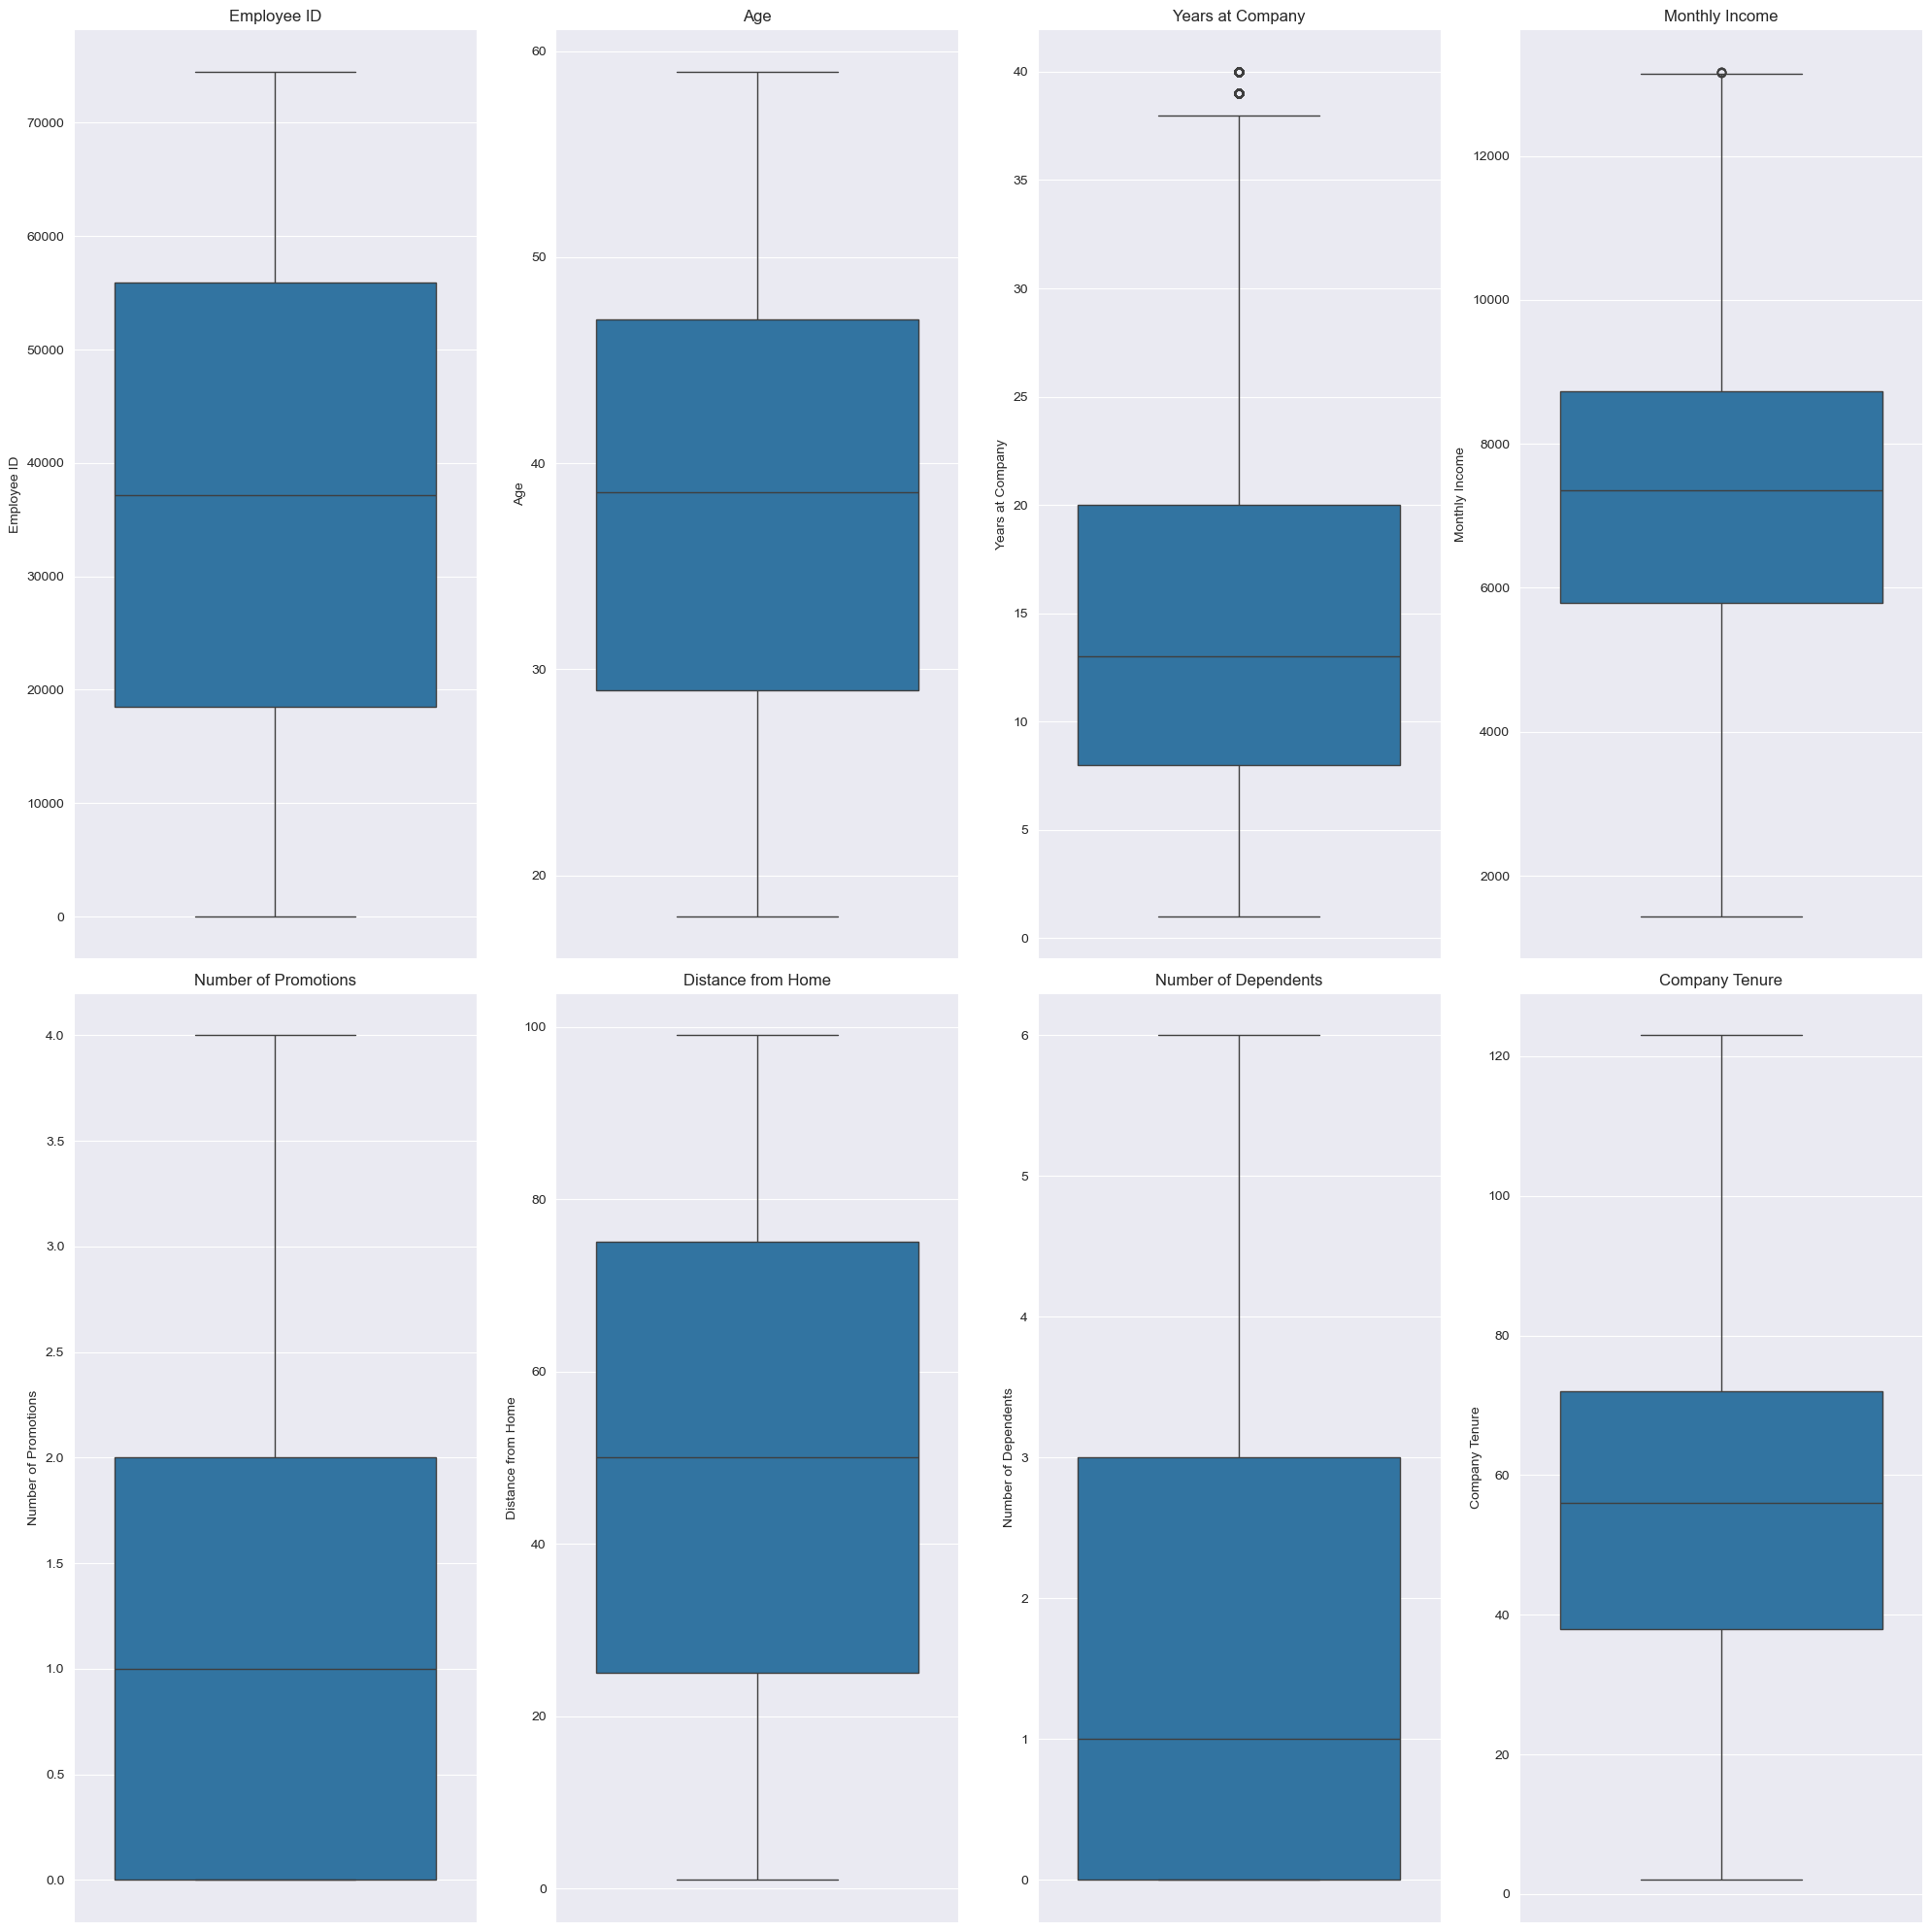

In [451]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_col):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- > Boxplot of numerical columns

### handle duplicates

In [452]:
df.duplicated().sum()

0

## 5- Data Preprocessing

### Correlation for numerical columns

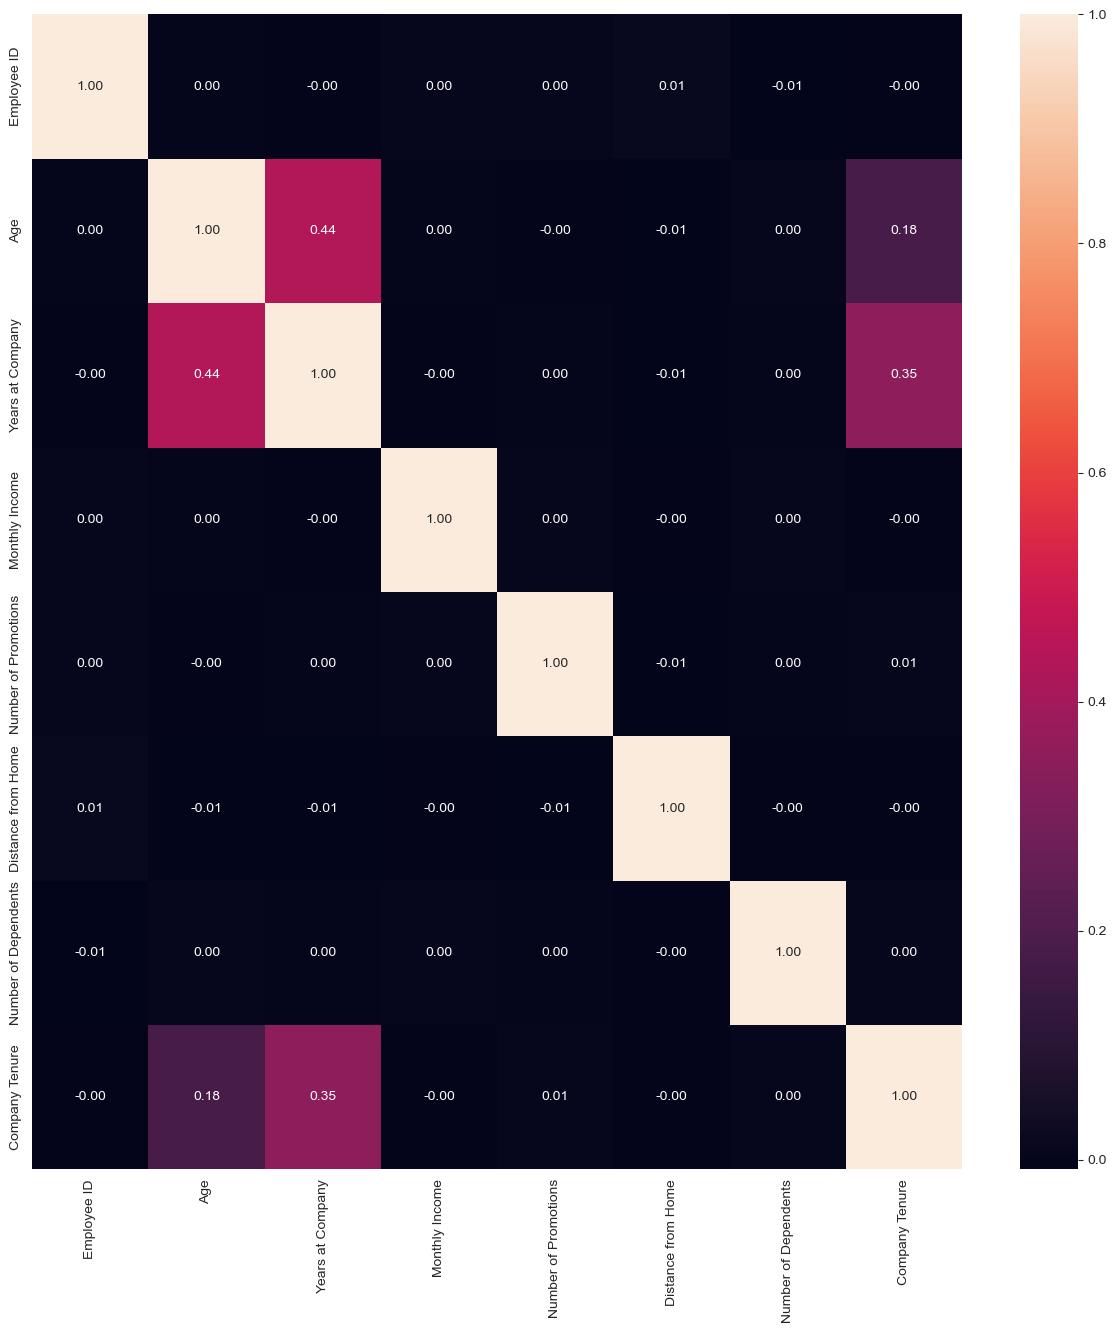

In [453]:
corr = df.select_dtypes(include=["float", "bool", "int"]).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [454]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410.0,31.0,Male,19.0,Education,5390.0,Good,Medium,Average,2.0,...,Married,0.0,Mid,Medium,89.0,No,No,Excellent,Medium,Stayed
1,64756.0,59.0,Female,4.0,Media,7350.0,Poor,High,Low,3.0,...,Divorced,3.0,Mid,Medium,21.0,No,No,Fair,Low,Stayed
2,30257.0,24.0,Female,13.0,Healthcare,8159.0,Good,High,Low,0.0,...,Married,3.0,Mid,Medium,74.0,No,No,Poor,Low,Stayed
3,65791.0,36.0,Female,7.0,Education,3989.0,Good,High,High,1.0,...,Single,2.0,Mid,Small,56.0,Yes,No,Good,Medium,Stayed
5,24368.0,38.0,Female,3.0,Technology,9977.0,Fair,High,Below Average,3.0,...,Married,0.0,Mid,Medium,47.0,No,Yes,Fair,High,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195.0,50.0,Female,13.0,Education,7350.0,Fair,High,Average,1.0,...,Single,2.0,Senior,Small,35.0,No,Yes,Poor,Very High,Left
59594,6266.0,18.0,Male,4.0,Healthcare,8040.0,Fair,High,High,3.0,...,Single,0.0,Senior,Medium,73.0,No,No,Fair,Medium,Left
59595,54887.0,22.0,Female,14.0,Technology,7944.0,Fair,High,High,0.0,...,Married,2.0,Entry,Small,29.0,No,No,Good,Medium,Stayed
59596,861.0,23.0,Male,8.0,Education,2931.0,Fair,Very High,Average,0.0,...,Single,0.0,Entry,Large,9.0,No,No,Good,Low,Left


### Encoding

In [455]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col = [col for col in cat_col if col not in [
    "Gender","Job Role","Education Level","Remote Work","Attrition"]
]
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    
attr_mapping = {
    "Stayed": 0,
    "Left": 1
}
df["Attrition"] = df["Attrition"].map(attr_mapping)

### One Hot Encoding

In [457]:
df = pd.get_dummies(df, columns=["Gender", "Job Role", "Education Level","Remote Work"], drop_first=True)

In [458]:
df = df.drop("Employee ID", axis=1)

### Correlation for categorical columns

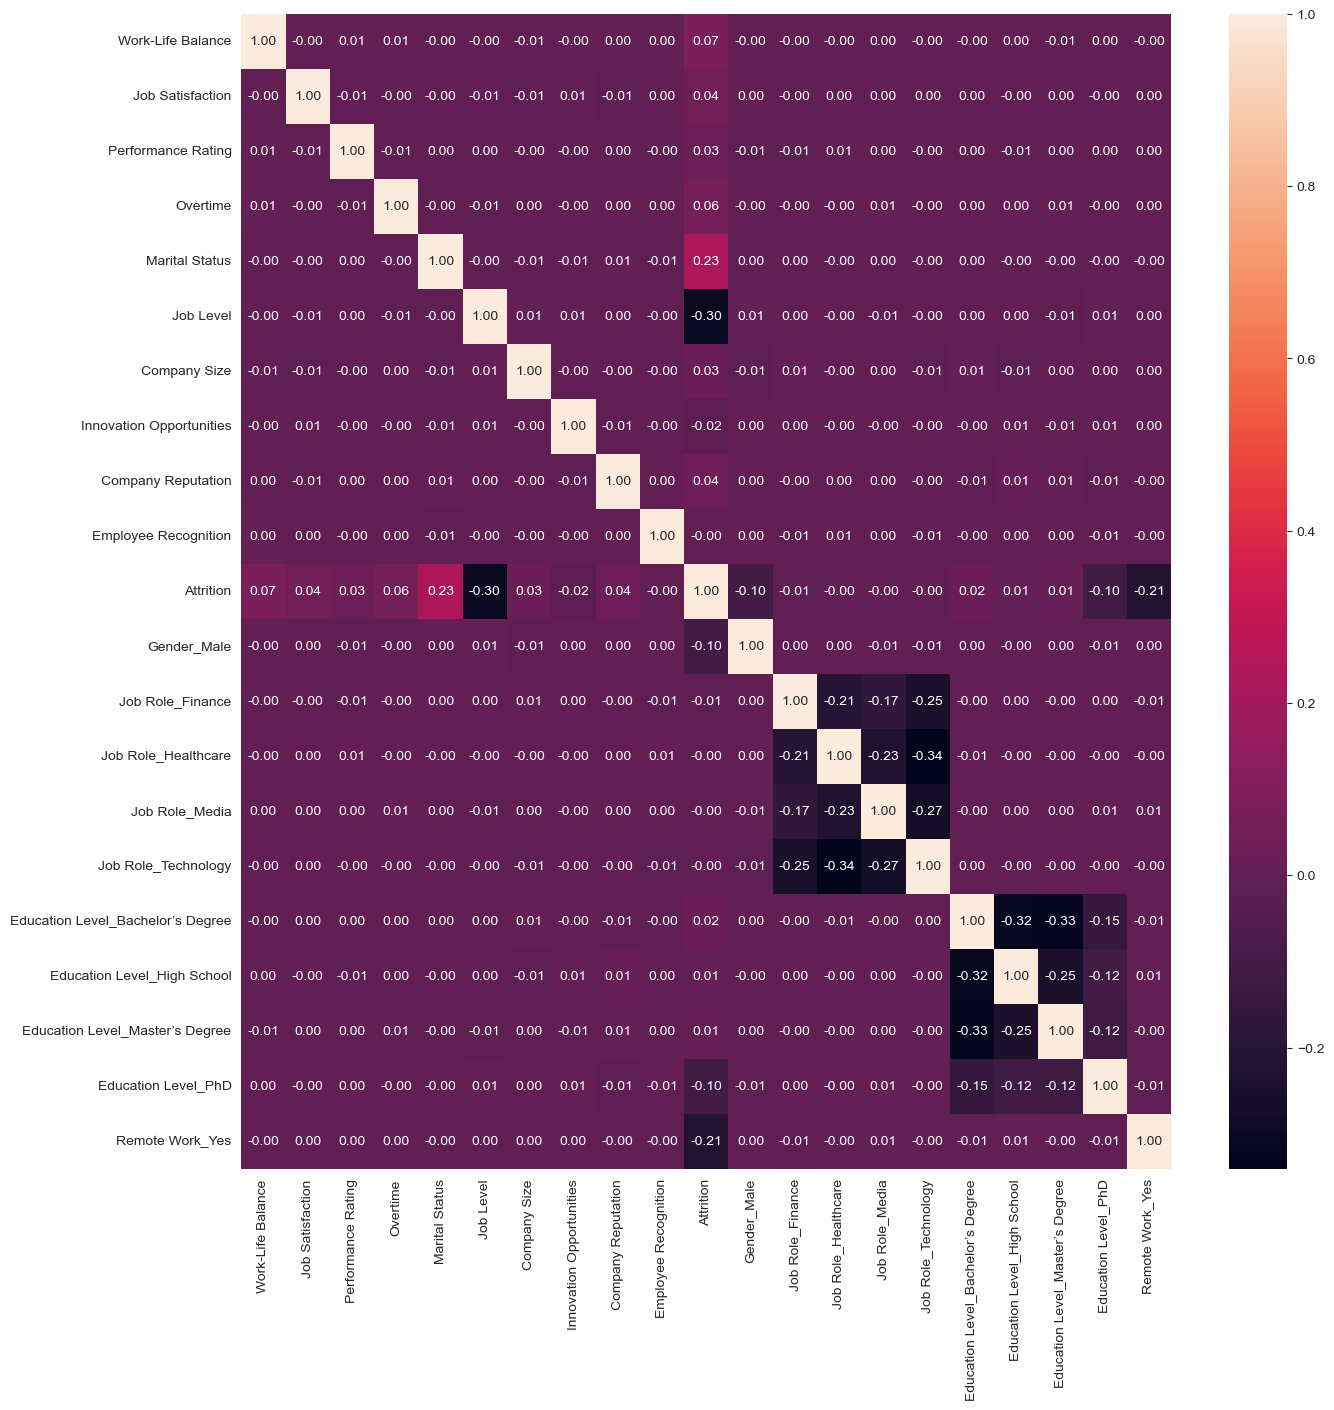

In [459]:
corr = df.select_dtypes(include=["bool", "int"]).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

### Drop uncorrelated columns

In [460]:
correlation_matrix = df.corr()

attrition_correlation = correlation_matrix['Attrition'].abs()
correlation_threshold = 0.02
uncorrelated_columns = attrition_correlation[attrition_correlation < correlation_threshold].index
df = df.drop(uncorrelated_columns, axis=1)

### Feature Engineering

In [461]:
df.columns

Index(['Age', 'Years at Company', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure',
       'Innovation Opportunities', 'Company Reputation', 'Attrition',
       'Gender_Male', 'Education Level_Bachelor’s Degree',
       'Education Level_PhD', 'Remote Work_Yes'],
      dtype='object')

In [462]:
# 1. Tenure per Dependents
# Rationale: Measures how long, on average, it takes for an employee to get promoted.
# Higher values suggest slower career progression, which could lead to dissatisfaction and attrition.
df['Tenure_Per_Dependents'] = df['Years at Company'] / (df['Number of Dependents'] + 1)

# 2. Tenure per Promotion
# Rationale: Measures how long, on average, it takes for an employee to get promoted.
# Higher values suggest slower career progression, which could lead to dissatisfaction and attrition.
df['Tenure_Per_Promotion'] = df['Years at Company'] / (df['Number of Promotions'] + 1) # Add 1 to avoid division by zero if no promotions

# 3. Performance Rating relative to Dependents
# Rationale: Indicates if performance is improving or declining over time spent at the company.
# Stagnant or declining performance relative to dependents could be a sign of disengagement.
df['Performance_Dependents_Ratio'] = df['Performance Rating'] / (df['Number of Dependents'] + 1)

# 4. Performance Rating relative to Tenure
# Rationale: Indicates if performance is improving or declining over time spent at the company.
# Stagnant or declining performance relative to tenure could be a sign of disengagement.
df['Performance_Tenure_Ratio'] = df['Performance Rating'] / (df['Years at Company'] + 1)

# 5. Job Satisfaction relative to Tenure
# Rationale: Measures how satisfied an employee is with their job over time spent at the company.
# Lower values might indicate dissatisfaction or stress, which could lead to attrition.
df['Satisfaction_Tenure_Ratio'] = df['Job Satisfaction'] / (df['Years at Company'] + 1)

# 6. Work-Life Balance and Job Satisfaction Interaction
# Rationale: An interaction term to see if the *combination* of balance and satisfaction is more impactful.
# For example, high satisfaction but low balance might still lead to attrition.
df['WorkLife_Satisfaction_Interaction'] = df['Work-Life Balance'] * df['Job Satisfaction']

# 7. Work-Life Balance relative to Tenure
# Rationale: Indicates if work-life balance is improving or declining over time spent at the company.
# High work-life balance relative to tenure might indicate a positive work-life balance.
df['WorkLife_Tenure_Ratio'] = df['Work-Life Balance'] / (df['Years at Company'] + 1)

# 8. Age relative to Company Tenure
# Rationale: Represents the proportion of an employee's career spent at the current company.
# Very high values might indicate long-term commitment, while very low values for older employees might indicate recent job changes.
df['Age_Company_Ratio'] = df['Years at Company'] / (df['Age'] + 1)

# 9. Age relative to Tenure
# Rationale: Represents the proportion of an employee's career spent at the current company.
# Very high values might indicate long-term commitment, while very low values for older employees might indicate recent job changes.
df['Age_Tenure_Ratio'] = df['Years at Company'] / (df['Age'] + 1)


In [463]:
df

,Age,Years at Company,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Marital Status,Number of Dependents,...,Remote Work_Yes,Tenure_Per_Dependents,Tenure_Per_Promotion,Performance_Dependents_Ratio,Performance_Tenure_Ratio,Satisfaction_Tenure_Ratio,WorkLife_Satisfaction_Interaction,WorkLife_Tenure_Ratio,Age_Company_Ratio,Age_Tenure_Ratio
0,31.0,19.0,2,2,0,2.0,0,22.0,1,0.0,...,False,19.000000,6.333333,0.000000,0.000000,0.100000,4,0.100000,0.593750,0.593750
1,59.0,4.0,4,0,3,3.0,0,21.0,0,3.0,...,False,1.000000,1.000000,0.750000,0.600000,0.000000,0,0.800000,0.066667,0.066667
2,24.0,13.0,2,0,3,0.0,0,11.0,1,3.0,...,False,3.250000,13.000000,0.750000,0.214286,0.000000,0,0.142857,0.520000,0.520000
3,36.0,7.0,2,0,2,1.0,0,27.0,2,2.0,...,True,2.333333,3.500000,0.666667,0.250000,0.000000,0,0.250000,0.189189,0.189189
5,38.0,3.0,1,0,1,3.0,0,37.0,1,0.0,...,False,3.000000,0.750000,1.000000,0.250000,0.000000,0,0.250000,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50.0,13.0,1,0,0,1.0,1,66.0,2,2.0,...,False,4.333333,6.500000,0.000000,0.000000,0.000000,0,0.071429,0.254902,0.254902
59594,18.0,4.0,1,0,2,3.0,0,42.0,2,0.0,...,False,4.000000,1.000000,2.000000,0.400000,0.000000,0,0.200000,0.210526,0.210526
59595,22.0,14.0,1,0,2,0.0,1,34.0,1,2.0,...,False,4.666667,14.000000,0.666667,0.133333,0.000000,0,0.066667,0.608696,0.608696
59596,23.0,8.0,1,3,0,0.0,0,62.0,2,0.0,...,False,8.000000,8.000000,0.000000,0.000000,0.333333,3,0.111111,0.333333,0.333333


## 6- Split Data

In [464]:
from sklearn.model_selection import train_test_split

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [427]:
print(X.columns.tolist())


['Age', 'Years at Company', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Company Reputation', 'Gender_Male', 'Education Level_Bachelor’s Degree', 'Education Level_PhD', 'Remote Work_Yes', 'Tenure_Per_Dependents', 'Tenure_Per_Promotion', 'Performance_Dependents_Ratio', 'Performance_Tenure_Ratio', 'Satisfaction_Tenure_Ratio', 'WorkLife_Satisfaction_Interaction', 'WorkLife_Tenure_Ratio', 'Age_Company_Ratio', 'Age_Tenure_Ratio']


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## 7- Build Model

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_val, y_val)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = rf.score(X_val, y_val)

### XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_score = xg.score(X_val, y_val)

### AdaBoost

In [465]:
from sklearn.ensemble import AdaBoostClassifier

In [466]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_score = ada.score(X_val, y_val)

### DNN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Convert data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)  # Float for BCEWithLogitsLoss

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)


In [ ]:
class Net(nn.Module):
    def __init__(self, ip_size):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(ip_size, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(32, 16)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(16, 1) 
        
    def forward(self, x):
        x = self.fc1(x)

        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)

        x = self.relu2(x)

        
        x = self.fc3(x)

        x = self.relu3(x)
        
        x = self.fc4(x)  
        return x

In [ ]:
ip_size = X_train.shape[1]
model = Net(ip_size).to(device)

criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005) 
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.9)


In [ ]:
epochs = 500
for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()

    output = model(X_train_tensor).squeeze()  # Shape: [batch_size]

    loss = criterion(output, y_train_tensor)

    loss.backward()
    optimizer.step()
    scheduler.step()

    if (epoch + 1) % 50 == 0 or epoch == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

In [ ]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    model.eval()
    output = model(X_val_tensor).squeeze()

    # Apply sigmoid + threshold 0.5
    pred = (torch.sigmoid(output) > 0.5).long()

    acc = accuracy_score(y_val_tensor.cpu(), pred.cpu())
nn_score = acc


## Models Result Before Tuning

In [467]:
df_score = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "XGBoost", "AdaBoost", "DNN"],
                   "Score": [lr_score, rf_score, xg_score, ada_score, nn_score]})

In [468]:
df_score

,Model,Score
0,Logistic Regression,0.721534
1,Random Forest,0.731124
2,XGBoost,0.739782
3,AdaBoost,0.740410
4,DNN,0.724327


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### AdaBoost

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300], # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0] # Learning rate
}

random_search = RandomizedSearchCV(
    AdaBoostClassifier(),
    param_distributions=param_dist, # Parameter distribution
    n_iter=15,  # Number of parameter settings
    cv=10,  # Number of cross-validation folds
    scoring='accuracy', # Scoring metric
    random_state=42, # Random seed
    n_jobs=-1 # Use all available cores
)

random_search.fit(X_train, y_train)
print(f'Best Params for AdaBoost: {random_search.best_params_}')
ada = random_search.best_estimator_
ada_tuned_score = ada.score(X_val, y_val)

In [ ]:
ada = random_search.best_estimator_
ada_tuned_score = ada.score(X_val, y_val)

In [469]:
df_score.loc[len(df_score)] = ["AdaBoost (Tuned)", ada_tuned_score]

## Models Result 

In [470]:
df_score

,Model,Score
0,Logistic Regression,0.721534
1,Random Forest,0.731124
2,XGBoost,0.739782
3,AdaBoost,0.740410
4,DNN,0.724327
5,AdaBoost (Tuned),0.752072


## 8- Save Model

In [472]:
import joblib

# Save the trained AdaBoost model
joblib.dump(ada, 'ada_model.pkl')

print("✅ Model saved as ada_model.pkl")


✅ Model saved as ada_model.pkl
